# Predicting Flight Delays

---

In [1]:
# General Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# R1.1 Imports
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score

#R1.2 Imports
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

#R1.3 Imports


## Data Preperation

Little data preperation is needed for these models as the initial cleaning is perfect for the needs. There will just be different subsets for each.


In [2]:
df = pd.read_csv("../data/ORD_11_21-11-22_model.csv")

In [3]:
# test = True # this is a temporary flag so it can run quickly
# if test:
#     df = df.iloc[0:1001]

## Logistic Regression (2 Classes)

In [4]:
# Two class subset
# df_x = df[['DOT_ID_Marketing_Airline', 'OriginAirportSeqID', 'DepTimeBlk', 'DepDelay', 'DestAirportSeqID', 'ArrTimeBlk', 'ArrDelay', 'Distance',
#                   'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'TaxiIn', 'TaxiOut']]
# df_y = df['ArrDel15']
# df_x = df[['DOT_ID_Marketing_Airline', 'OriginAirportSeqID', 'DepTimeBlk', 'DepDelay', 'DestAirportSeqID', 'ArrTimeBlk', 'Distance', 'TaxiOut']]
# df_y = df['ArrDel15']

df_x = df[['DOT_ID_Marketing_Airline', 'OriginAirportSeqID', 'DepTimeBlk', 'DepDelay', 'DestAirportSeqID', 'ArrTimeBlk', 'Distance', 'TaxiOut', 'CRSDepTime', 'CRSArrTime']]
df_y = df['ArrDel15']

In [5]:
x_train, x_test, y_train, y_test= train_test_split(df_x, df_y, test_size=.25)


In [6]:
fit = LogisticRegression(solver='lbfgs', max_iter=10000, class_weight={0:15, 1:85}, random_state=15).fit(x_train, y_train)
# fit = LogisticRegression(solver='lbfgs', max_iter=10000).fit(x_train, y_train)

In [7]:
y_pred = fit.predict(x_test)
y_prob = fit.predict_proba(x_test)
y_prob = y_prob[:,1] # want the positive values

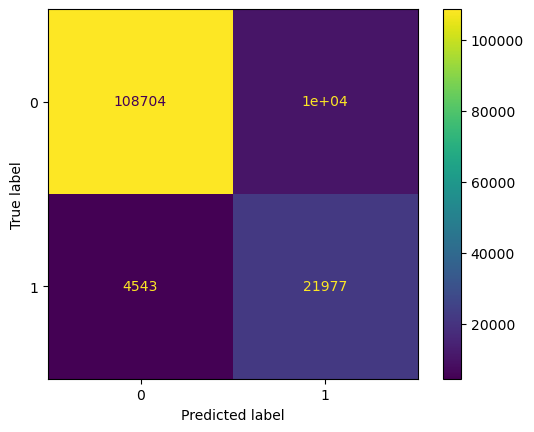

In [8]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=matrix).plot()

In [9]:
print(f"Accuracy of Model: {accuracy_score(y_test, y_pred)}")
print(f"Precision of Model: {precision_score(y_test, y_pred)}")
print(f"Recall of Model: {recall_score(y_test, y_pred)}")

Accuracy of Model: 0.8970353031623891
Precision of Model: 0.6775914164148733
Recall of Model: 0.8286953242835596


AUC Score: 0.9397515081975294


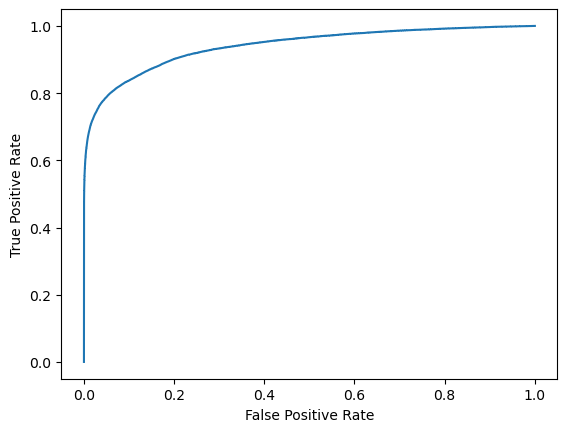

In [10]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

print(f"AUC Score: {auc}")

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

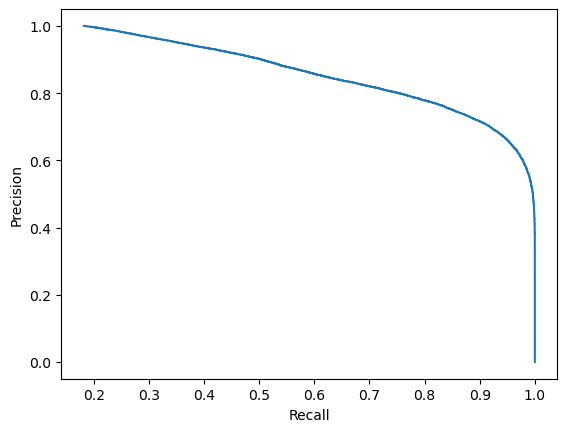

In [11]:
prec, recall, _ = precision_recall_curve(y_test, y_prob)

plt.plot(prec,recall)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

## Logistic Regression (Multiple Classes)

In [12]:
# Multi class subset **overwriting variables**
# df_x= df[['DOT_ID_Marketing_Airline', 'OriginAirportSeqID', 'DepTimeBlk', 'DepDelay', 'DestAirportSeqID', 'ArrTimeBlk', 'ArrDelay', 'Distance',
#                   'CarrierDelay', 'WeatherDelay', 
# 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'TaxiIn', 'TaxiOut']]
# df_y= df['ArrivalDelayGroups']
# df_x = df[['DOT_ID_Marketing_Airline', 'OriginAirportSeqID', 'DepTimeBlk', 'DepDelay', 'DestAirportSeqID', 'ArrTimeBlk', 'Distance',
#                   'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'TaxiOut']]
# df_y = df['ArrivalDelayGroups']
df_x = df[['DOT_ID_Marketing_Airline', 'OriginAirportSeqID', 'DepTimeBlk', 'DepDelay', 'DestAirportSeqID', 'ArrTimeBlk', 'Distance', 'TaxiOut', 'CRSDepTime', 'CRSArrTime']]
df_y = df['ArrivalDelayGroups']

In [13]:
x_train, x_test, y_train, y_test= train_test_split(df_x, df_y, test_size=.25)

In [14]:
# fit = LogisticRegression(solver='lbfgs', max_iter=10000, class_weight={0:15, 1:85}, random_state=15).fit(x_train, y_train)
fit = LogisticRegression(solver='sag', max_iter=10000, multi_class='multinomial').fit(x_train, y_train)

In [15]:
y_pred = fit.predict(x_test)
y_prob = fit.predict_proba(x_test)
y_prob = y_prob[:,1] # want the positive values

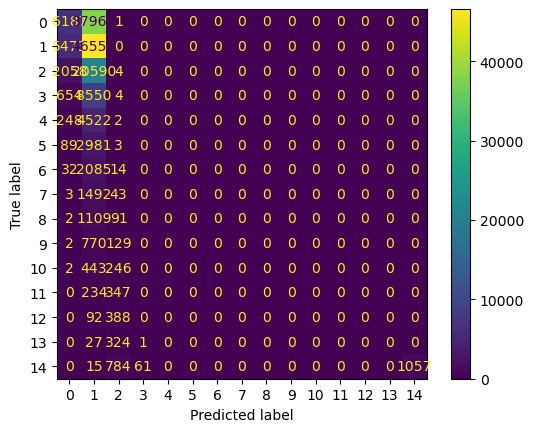

In [16]:
matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=matrix).plot()

In [17]:
print(f"Accuracy of Model: {accuracy_score(y_test, y_pred)}")

Accuracy of Model: 0.36934123186963297


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -2.0       0.42      0.14      0.21     44152
        -1.0       0.37      0.89      0.52     52031
         0.0       0.00      0.00      0.00     22652
         1.0       0.00      0.00      0.00      9208
         2.0       0.00      0.00      0.00      4772
         3.0       0.00      0.00      0.00      3073
         4.0       0.00      0.00      0.00      2131
         5.0       0.00      0.00      0.00      1538
         6.0       0.00      0.00      0.00      1202
         7.0       0.00      0.00      0.00       901
         8.0       0.00      0.00      0.00       691
         9.0       0.00      0.00      0.00       581
        10.0       0.00      0.00      0.00       480
        11.0       0.00      0.00      0.00       352
        12.0       1.00      0.55      0.71      1917

    accuracy                           0.37    145681
   macro avg       0.12      0.11      0.10    145681
weighted avg       0.27   

c:\Users\adenr\anaconda3\envs\dat490\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\adenr\anaconda3\envs\dat490\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\adenr\anaconda3\envs\dat490\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random Forrest Decision Tree